# Linear Regression - Code

In diesem Notebook schauen wir uns an, wie das Modell der `Linearen Regression` funktioniert.

Unter "Setup" ist Code den wir später gebrauchen.
Unter "Intuition" setzen wir die Parameter der Linearen Regression von Hand (`aus Expertenwissen`).
Unter "Lernen" lernen wir die Parameter `aus Daten` selbst mittels der `fit` Methode.

## Setup

Setup Code muss *nicht* verstanden werden.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_data(ax, data, x, y):
    sns.scatterplot(x=data[x], y=data[y], ax=ax)
    ax.set_xlim(0, df[x].max() + 1)
    ax.set_ylim(0, df[y].max() + 500)

def plot_model(ax, data, x, y, expert_model):
    plot_data(ax, data, x, y)
    sns.lineplot(x=ax.get_xlim(), y=map(expert_model, ax.get_xlim()), color='orange', ax=ax)

def get_hard_coded_model(beta_0, beta_1):
    def model(x1):
        return beta_0 + beta_1 * x1
    return model

def plot_betas_combinations(df, axes, x, y, betas_combinations):
    for ax, beta_0, beta_1 in zip(
        axes.flatten(),
        *zip(*betas_combinations),
    ):
        ax.title.set_text(f'Gesetzt | beta_0 = {beta_0}, beta_1 = {beta_1}')
        plot_model(ax, df, x, y, get_hard_coded_model(beta_0 = beta_0, beta_1 = beta_1))
    plt.tight_layout()
    plt.show()



## Intuition: $\vec{\beta}$ von Hand setzen

Zuerst mal visualisieren wir die Datenpunkte, welche wir verwenden.

Um das ganze zu vereinfachen und zu visualisieren, verwenden wir **nur 1 Feature**!
Wir versuchen **von der Breite eines Fisches, das Gewicht des Fisches vorherzusagen**.

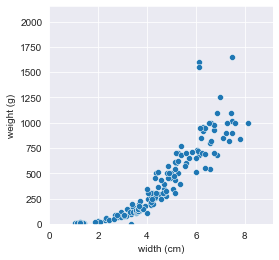

In [3]:
df = pd.read_csv('data/fish.csv')[['Width', 'Weight']].rename(columns={
    'Width': 'width (cm)',
    'Weight': 'weight (g)'
})

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(ax, df, 'width (cm)', 'weight (g)')

Das `Lineare Modell` ist eine Hyperebene.
Für 1 Feature entspricht es also einer Geraden: $\text{weight} = \beta_0 + \beta_1 * \text{width}$

$\text{weight}$ ist der Output, hier das Gewicht vom Fisch.
$\text{width}$ ist der Input, hier die Breite vom Fisch.
$\vec{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix} $ sind die Parameter die gelernt werden können.

Hier in der Intuition setzen wir verschiedene Werte von Hand, um ein Gefühl für die Parameter und das Modell zu bekommen.

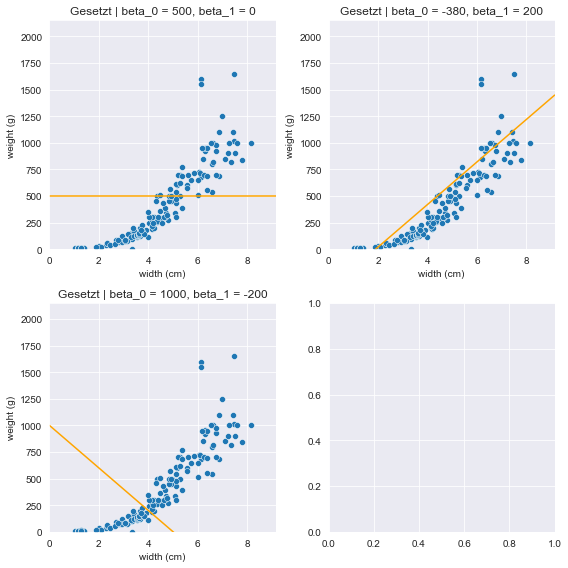

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plot_betas_combinations(df, axes, 'width (cm)', 'weight (g)', [
    # beta_0, beta_1
    [    500,      0],
    [   -380,    200 ],
    [   1000,   -200 ],
])

### Ploterklärung

Die blauen Punkte sind die echten Daten, die so beobachtet/gemessen wurden. Hier wäre ein blauer Punkt ein Fisch der mit dieser Breite und diesem Gewicht gemessen wurde.

Die orange Linie ist unser Modell. Es gibt für jeglichen möglichen Input (Breite) ein dazugehörenden Output (Gewicht).
Beim 1. Plot beispielsweise `predicted` das Modell immer das Gewicht `500g`, egal welche Breite der Fisch hat.
Beim 2. Plot `predicted` das Modell ein grösseres Gewicht bei einer grösseren Breite für z.B. eine Breite von `4cm` ein Gewicht von `500g`.
Beim 3. Plot `predicted` das Modell ein grösseres Gewicht bei einer kleineren Breite für z.B. eine Breite von `4cm` ein Gewicht von `250g`.
Das Modell im 1. Plot nutzt den Input nicht.
Das Modell im 2. Plot nutzt den Input und scheint für ein lineares Modell gut zu sein.
Das Modell im 3. Plot ist natürlich schwachsinnig, daher verläuft es auch gegen die Daten.

Eine Krümmung kann das `lineare Modell` gar nicht lernen (zumindest nicht ohne Tricks, die wir im Verlauf des Modules noch kennenlernen werden).

### Selbst ausprobieren

Wenn Du diese Zelle selbst laufen lässt, kannst du Beta_0 und Beta_1 eingeben und das Modell mit diesen Beta's wird geplottet.

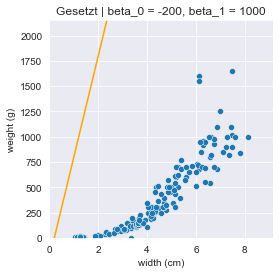

In [5]:
beta_0=int(input('Beta 0'))
beta_1=int(input('Beta 1'))
_, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.title.set_text(f'Gesetzt | beta_0 = {beta_0}, beta_1 = {beta_1}')
plot_model(ax, df, 'width (cm)', 'weight (g)', get_hard_coded_model(beta_0 = beta_0, beta_1 = beta_1))
plt.show()

## Lernen: $\vec{\beta}$ aus Daten lernen

Ziel im Machine Learning ist es die $\vec{\beta}$s `aus Daten` zu lernen anstatt mühsam `aus Expertenwissen` zu beziehen.

Hier erstellen wir zuerst eine `Lineare Regression` und lernen anschliessend die $\vec{\beta}$ in der `fit` Methode.
Schlussendlich wenden wir das gelernte Model mittels `predict` auf einen Datenpunkt an.

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  # Erstellen vom Modell

lr.fit(X=df[['width (cm)']], y=df['weight (g)'])  # Modell lernt (Lernphase)

example = 5 # 5cm
y_hat = lr.predict(X=[[example]])  # Modell anwenden (Anwendungsphase)

print(f"Vorhersage für {example}cm ist {round(y_hat[0])}g")  # Ausgeben vom Resultat auf die Konsole

Vorhersage für 5cm ist 508g


/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Die gelernten $\vec{\beta}$ können wir aus der `Linearen Regression` wie folgt beziehen:

In [7]:
beta_0 = lr.intercept_
beta_1 = lr.coef_[0]
print("Gelernte Betas:", f"beta_0={beta_0}, beta_1={beta_1}", sep="\n")

Gelernte Betas:
beta_0=-433.258852521786, beta_1=188.24855477270566


Und wir können die gelernten $\vec{\beta}$ auch noch visualisieren.

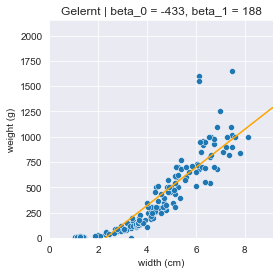

In [8]:
_, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.title.set_text(f'Gelernt | beta_0 = {round(beta_0)}, beta_1 = {round(beta_1)}')
plot_model(ax, df, 'width (cm)', 'weight (g)', get_hard_coded_model(beta_0 = beta_0, beta_1 = beta_1))
plt.show()

# Teil 2

In [9]:
from sklearn.metrics import mean_squared_error

def J(beta_0: float, beta_1: float):
    model = get_hard_coded_model(beta_0, beta_1)
    y = df['weight (g)']
    y_hat = df['width (cm)'].apply(model)
    return mean_squared_error(y, y_hat)

print("1. Modell (Konstantes Modell):      ", f"{round(J(beta_0 =  500, beta_1 =    0)):>8}")
print("2. Modell (Sinnvolles Modell):      ", f"{round(J(beta_0 = -380, beta_1 =  200)):>8}")
print("3. Modell (Schwachsinniges Modell): ", f"{round(J(beta_0 = 1000, beta_1 = -200)):>8}")

1. Modell (Konstantes Modell):         137680
2. Modell (Sinnvolles Modell):          38716
3. Modell (Schwachsinniges Modell):    532380
